In [1]:
from helper_code import *
import numpy as np, os, sys, joblib
import ecg_plot
import pandas as pd
from glob import glob
import os
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tsai.all import *
import torch
codes = pd.read_csv("dataset/codes.csv")


def snomedConvert(code,snomed=True):
    codes = pd.read_csv("dataset/codes.csv")[["Dx","SNOMED CT Code"]]
    
    if snomed:
        df.columns = [codes[codes["SNOMED CT Code"] == x].iloc[0]["Dx"] for x in df.columns]
        return df

In [2]:
df = pd.read_csv("dataset/WFDB_Ga.csv")
df

,6374002,11157007,17338001,27885002,39732003,47665007,49578007,55930002,59118001,59931005,...,429622005,445118002,445211001,698252002,713422000,713426002,713427006,67741000119109,headers,leads
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E00001.hea,dataset/WFDB_Ga/E00001.mat
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E00002.hea,dataset/WFDB_Ga/E00002.mat
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E00003.hea,dataset/WFDB_Ga/E00003.mat
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E00004.hea,dataset/WFDB_Ga/E00004.mat
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E00005.hea,dataset/WFDB_Ga/E00005.mat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E10340.hea,dataset/WFDB_Ga/E10340.mat
10340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E10341.hea,dataset/WFDB_Ga/E10341.mat
10341,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,dataset/WFDB_Ga/E10342.hea,dataset/WFDB_Ga/E10342.mat
10342,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,dataset/WFDB_Ga/E10343.hea,dataset/WFDB_Ga/E10343.mat


In [3]:
X = np.load('./dataset/big_numpy_datasets/WFDB_CPSC2018.npy', mmap_mode='c')
df = pd.read_csv("dataset/WFDB_CPSC2018.csv").drop(columns=["headers","leads"])

y = snomedConvert(df)
y = y[y.columns[0]].to_numpy()
y

array([ True, False, False, ..., False, False, False])

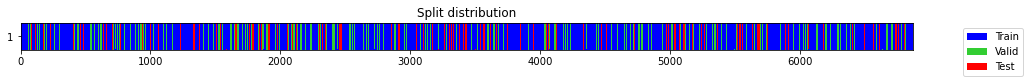

((#4815) [2849,6802,4096,496,2012,173,1178,5343,505,5739...],
 (#1375) [4964,5847,413,6628,1735,5258,6065,3308,3619,3857...],
 (#687) [2626,5678,5053,2717,3363,963,5856,5471,1253,148...])

In [4]:
splits = get_splits(y, valid_size=.2,test_size=0.1, stratify=True, random_state=23, shuffle=True)
splits

In [5]:
# # classifying a single label with inceptiontimeplus
# tfms = [None, TSClassification()]
# batch_tfms = [TSStandardize(by_sample=True)]
# dsets = TSDatasets(X.astype(float), y, tfms=tfms, splits=splits) # inplace=True by default
# dls   = TSDataLoaders.from_dsets(dsets.train,dsets.valid, bs=[64, 128], batch_tfms=batch_tfms, num_workers=0)
# model = InceptionTimePlus(dls.vars, dls.c)
# learn = Learner(dls, model, metrics=[accuracy, BalancedAccuracy(),F1Score(),RocAucBinary()], cbs=PredictionDynamics())
# learn.fit_one_cycle(10, lr_max=1e-4)
# learn.recorder.plot_metrics()

In [6]:
# tfms = [None, TSClassification()]
# batch_tfms = [TSStandardize(by_sample=True)]
# dls = get_ts_dls(X.astype(float), y, splits=splits, tfms=tfms, batch_tfms=batch_tfms)
# model = build_ts_model(MiniRocket, dls=dls)
# learn = Learner(dls, model, metrics=[accuracy, BalancedAccuracy(),F1Score(),RocAucBinary()], cbs=PredictionDynamics())
# learn.fit_one_cycle(10, lr_max=3e-4)
# learn.recorder.plot_metrics()

In [7]:
# # classifying a single label with inceptiontimeplus
# tfms = [None, TSClassification()]
# batch_tfms = [TSStandardize(by_sample=True)]
# dsets = TSDatasets(X.astype(float), y, tfms=tfms, splits=splits) # inplace=True by default
# dls   = TSDataLoaders.from_dsets(dsets.train,dsets.valid, bs=[64, 128], batch_tfms=batch_tfms, num_workers=0)
# model = XCMPlus(dls.vars, dls.c)
# learn = Learner(dls, model, metrics=[accuracy, BalancedAccuracy(),F1Score(),RocAucBinary()], cbs=PredictionDynamics())
# learn.fit_one_cycle(10, lr_max=1e-4)
# learn.recorder.plot_metrics()

# Multi Comparision (for 1 class only)

In [ ]:
archs = [(FCN, {}), (ResNet, {}), (xresnet1d34, {}), (ResCNN, {}), 
         (LSTM, {'n_layers':1, 'bidirectional': False}), (LSTM, {'n_layers':2, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}), 
         (LSTM, {'n_layers':1, 'bidirectional': True}), (LSTM, {'n_layers':2, 'bidirectional': True}), (LSTM, {'n_layers':3, 'bidirectional': True}),
         (LSTM_FCN, {}), (LSTM_FCN, {'shuffle': False}), (InceptionTime, {}), (XceptionTime, {}), (OmniScaleCNN, {}), (mWDN, {'levels': 4})]

results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'accuracy', 'time'])
tfms = [None, TSClassification()]
batch_tfms = [TSStandardize(by_sample=True)]
dsets = TSDatasets(X.astype(float), y, tfms=tfms, splits=splits) # inplace=True by default
dls   = TSDataLoaders.from_dsets(dsets.train,dsets.valid, bs=[64, 128], batch_tfms=batch_tfms, num_workers=0)
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=accuracy)
    start = time.time()
    learn.fit_one_cycle(100, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    results.loc[i] = [arch.__name__, k, total_params(model)[0], vals[0], vals[1], vals[2], int(elapsed)]
    results.sort_values(by='accuracy', ascending=False, ignore_index=True, inplace=True)
    clear_output()
    display(results)


,arch,hyperparams,total params,train loss,valid loss,accuracy,time
0,FCN,{},274178,0.005793,0.241152,0.950545,349
1,xresnet1d34,{},7229314,0.000011,0.418146,0.950545,540
2,ResNet,{},484098,0.000078,0.360995,0.949091,552
3,ResCNN,{},261891,0.000286,0.407090,0.942545,412
4,LSTM,"{'n_layers': 2, 'bidirectional': True}",333202,0.019093,0.250862,0.942545,3204
5,LSTM,"{'n_layers': 2, 'bidirectional': False}",126602,0.076961,0.241587,0.932364,1521
6,LSTM,"{'n_layers': 3, 'bidirectional': False}",207402,0.198054,0.230076,0.927273,2208
7,LSTM,"{'n_layers': 1, 'bidirectional': False}",45802,0.111915,0.217680,0.925091,978
8,LSTM,"{'n_layers': 1, 'bidirectional': True}",91602,0.174080,0.220163,0.923636,1576


LSTM


epoch,train_loss,valid_loss,accuracy,time
0,0.685242,0.665903,0.730182,00:41
1,0.634350,0.588209,0.730182,00:40
2,0.592731,0.576243,0.730182,00:39
3,0.572849,0.568339,0.730909,00:39
4,0.562363,0.552585,0.741091,00:39
5,0.534022,0.524533,0.754182,00:39
6,0.501628,0.494935,0.779636,00:48
7,0.484058,0.464965,0.809455,00:48
8,0.393898,0.339859,0.852364,00:48
9,0.354051,0.333597,0.877091,00:48


# Multi Label Problem

In [ ]:
df = pd.read_csv("dataset/WFDB_CPSC2018.csv").drop(columns=["headers","leads"])
y = snomedConvert(df)
y_multi = []
for i,row in y.iterrows():
    sample_labels = []
    for i,r in enumerate(row):
        if r == True:
            sample_labels.append(y.columns[i])
        
    y_multi.append(list(tuple(sample_labels)))
label_counts = collections.Counter([a for r in y_multi for a in r])
print('Counts by label:', dict(label_counts))

In [ ]:
tfms  = [None, TSMultiLabelClassification()]
batch_tfms = [TSStandardize(by_sample=True)]
dsets = TSDatasets(X.astype(float), y_multi, tfms=tfms, splits=splits) # inplace=True by default
dls   = TSDataLoaders.from_dsets(dsets.train,dsets.valid, bs=[64, 128], batch_tfms=batch_tfms, num_workers=0)
metrics =[accuracy_multi, balanced_accuracy_multi, precision_multi, recall_multi, specificity_multi, F1_multi] 
model = InceptionTimePlus(dls.vars, dls.c)
learn = Learner(dls, model, metrics=metrics,loss_func=nn.BCEWithLogitsLoss(), cbs=ShowGraph())
learn.fit_one_cycle(250, lr_max=1e-4)
learn.recorder.plot_metrics()

In [ ]:
tfms  = [None, TSMultiLabelClassification()]
batch_tfms = [TSStandardize(by_sample=True), TSMagScale()]
dsets = TSDatasets(X.astype(float), y_multi, tfms=tfms, splits=splits) # inplace=True by default
dls   = TSDataLoaders.from_dsets(dsets.train,dsets.valid, bs=[64, 128], batch_tfms=batch_tfms, num_workers=0)
metrics =[accuracy_multi, balanced_accuracy_multi, precision_multi, recall_multi, specificity_multi, F1_multi] 
model = InceptionTimePlus(dls.vars, dls.c)
learn = Learner(dls, model, metrics=metrics,loss_func=nn.BCEWithLogitsLoss(), cbs=ShowGraph())
learn.fit_one_cycle(250, lr_max=1e-4)
learn.recorder.plot_metrics()